In [4]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [9]:
X = train.iloc[:,1:]
Y = train['label']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [11]:
per = Perceptron(verbose=1)
per.fit(x_train,y_train)
preds_per = per.predict(x_test)
cm_slp = confusion_matrix(y_test, preds_per)
clas_rep_slp = classification_report(y_test,preds_per)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.58 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.7s finished


In [12]:
print(cm_slp)
print(clas_rep_slp)

[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78       817
           9       0.92     

In [13]:
per.coef_.shape

(10, 784)

In [14]:
# Bias and intercept are used interchangeably.
per.intercept_

array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
       -3996., -1616.])

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), verbose=1, random_state=123)
mlp.fit(x_train,y_train)
preds_mlp = mlp.predict(x_test)

Iteration 1, loss = 3.94169702
Iteration 2, loss = 1.35736435
Iteration 3, loss = 1.01940349
Iteration 4, loss = 0.84244621
Iteration 5, loss = 0.73913542
Iteration 6, loss = 0.67797245
Iteration 7, loss = 0.64415324
Iteration 8, loss = 0.61427454
Iteration 9, loss = 0.58410470
Iteration 10, loss = 0.55879376
Iteration 11, loss = 0.49215218
Iteration 12, loss = 0.45592746
Iteration 13, loss = 0.42851116
Iteration 14, loss = 0.40318218
Iteration 15, loss = 0.38689829
Iteration 16, loss = 0.37453476
Iteration 17, loss = 0.35740677
Iteration 18, loss = 0.34135945
Iteration 19, loss = 0.33477586
Iteration 20, loss = 0.32580908
Iteration 21, loss = 0.31523972
Iteration 22, loss = 0.30116722
Iteration 23, loss = 0.29136387
Iteration 24, loss = 0.28558646
Iteration 25, loss = 0.27735506
Iteration 26, loss = 0.27266574
Iteration 27, loss = 0.27062563
Iteration 28, loss = 0.25933873
Iteration 29, loss = 0.25196397
Iteration 30, loss = 0.25438021
Iteration 31, loss = 0.24328995
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [16]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
class_rep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(class_rep_mlp)

[[757   0   6   1   2   4   6   0   8   1]
 [  0 918  10   6   1   2   4   0   8   0]
 [ 11   2 778   9   6   4  11   3  14   0]
 [  2   6  35 775   0   8   2  12  13   5]
 [  1   5   1   2 741   3  13   1  10  19]
 [  5   1   7  35   0 717  14   1  15   5]
 [  6   6   3   0   7  12 825   0  10   1]
 [  3   7  18  14   5   2   0 790   2  19]
 [ 12  15  13  20   3   7  10   3 723  11]
 [  6   1   0  14  39   9   0  23  11 724]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       785
           1       0.96      0.97      0.96       949
           2       0.89      0.93      0.91       838
           3       0.88      0.90      0.89       858
           4       0.92      0.93      0.93       796
           5       0.93      0.90      0.91       800
           6       0.93      0.95      0.94       870
           7       0.95      0.92      0.93       860
           8       0.89      0.88      0.89       817
           9       0.92     

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import  CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

In [18]:
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)

print(y_train_tc.shape)
print(y_test_tc.shape)

(33600, 10)
(8400, 10)


In [19]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=(784)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, y_train_tc, validation_data=(x_test,y_test_tc),epochs=100,verbose=2)

Epoch 1/100
1050/1050 - 10s - loss: 2.4784 - accuracy: 0.7705 - val_loss: 0.3556 - val_accuracy: 0.9081 - 10s/epoch - 10ms/step
Epoch 2/100
1050/1050 - 9s - loss: 0.4463 - accuracy: 0.8794 - val_loss: 0.2523 - val_accuracy: 0.9298 - 9s/epoch - 8ms/step
Epoch 3/100
1050/1050 - 7s - loss: 0.3375 - accuracy: 0.9065 - val_loss: 0.2216 - val_accuracy: 0.9379 - 7s/epoch - 7ms/step
Epoch 4/100
1050/1050 - 6s - loss: 0.3136 - accuracy: 0.9168 - val_loss: 0.2364 - val_accuracy: 0.9349 - 6s/epoch - 6ms/step
Epoch 5/100
1050/1050 - 6s - loss: 0.2737 - accuracy: 0.9263 - val_loss: 0.1983 - val_accuracy: 0.9442 - 6s/epoch - 6ms/step
Epoch 6/100
1050/1050 - 8s - loss: 0.2718 - accuracy: 0.9299 - val_loss: 0.1950 - val_accuracy: 0.9480 - 8s/epoch - 7ms/step
Epoch 7/100
1050/1050 - 5s - loss: 0.2447 - accuracy: 0.9374 - val_loss: 0.1988 - val_accuracy: 0.9511 - 5s/epoch - 5ms/step
Epoch 8/100
1050/1050 - 5s - loss: 0.2376 - accuracy: 0.9391 - val_loss: 0.2275 - val_accuracy: 0.9477 - 5s/epoch - 5ms/st

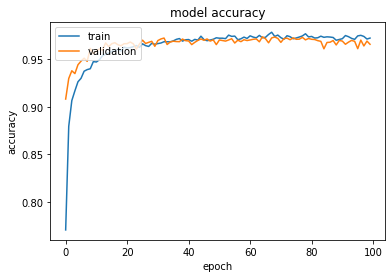

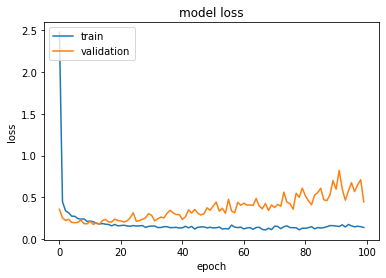

In [22]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
preds_final =  model.predict(test)
preds_final.shape

(28000, 10)

In [24]:
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis=1))
preds_final = model.predict(test)
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis = 1))


In [25]:
preds_final_class.to_csv('Submission.csv')
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Label'] = preds_final_class
sample_submission


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,8
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
sample_submission.to_csv('Final_Submission.csv',index=False)
sample_submission.describe()

,ImageId,Label
count,28000.000000,28000.000000
mean,14000.500000,4.484857
std,8083.048105,2.891984
min,1.000000,0.000000
25%,7000.750000,2.000000
50%,14000.500000,4.000000
75%,21000.250000,7.000000
max,28000.000000,9.000000
